In [3]:
# !pip install google-api-python-client

In [30]:
import googleapiclient.discovery
import pandas as pd

from googleapiclient.errors import HttpError
import time
import tqdm

import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from konlpy.tag import Okt

In [33]:
API_KEY = ""

In [6]:
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=API_KEY)

In [7]:
def get_video_ids(query, max_results=50):
    video_ids = []
    try:
        request = youtube.search().list(
            q=query,
            part="snippet",
            maxResults=max_results,
            type="video"
        )
        response = request.execute()        
        
        video_ids = [item['id']['videoId'] for item in response['items'] if item['id']['kind'] == 'youtube#video']
        
    except HttpError as e:
        error_reason = e.resp.get('reason')
        if error_reason == 'quotaExceeded':
            print("Quota exceeded. Saving collected data...")
            save_data_to_csv(video_comments)
            exit()
        else:
            print(f"An error occurred: {e}")
    return video_ids

In [8]:
def get_top_korean_comments(video_id, max_results=100):

    comments = []
    try:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=max_results,
            textFormat="plainText"
        )
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
#         한글자막만 가져오고싶은경우
#             try:
#                 # Add only Korean comments after language detection
#                 if detect(comment) == 'ko':
#                     comments.append(comment)
#                 if len(comments) >= top_k:
#                     break
#             except LangDetectException:
#                 continue
    except HttpError as e:
#         댓글사용이 중지되었습니다./댓글제한이있는경우
        error_reason = e.resp.get('reason')
        if error_reason == 'commentsDisabled':
            print(f"Comments are disabled for video {video_id}. Skipping.")
        else:
            print(f"An error occurred: {e}")
    
    return comments

In [14]:
def save_data_to_csv(video_comments):    
    data = {"Video_ID": [], "Comment": []}
    for video_id, comments in video_comments.items():
        for comment in comments:
            data["Video_ID"].append(video_id)
            data["Comment"].append(comment)

    df = pd.DataFrame(data)
    df.to_csv("data/youtube_comments.csv", index=False)

In [10]:
start = time.time()

query = '흑백요리사'
video_comments = {}

try:
    video_ids = get_video_ids(query, 50)
    for video_id in tqdm.tqdm(video_ids):
        comments = get_top_korean_comments(video_id,100)
        video_comments[video_id] = comments
except HttpError as e:
    if e.resp.get('reason') == 'quotaExceeded':
        print("Quota exceeded. Saving collected data...")
        save_data_to_csv(video_comments)
        exit()

end = time.time()    
print(f"{end - start}s for {query}")
print(video_comments)
save_data_to_csv(video_comments)

100%|██████████| 50/50 [00:12<00:00,  4.11it/s]

13.038443565368652s for 흑백요리사
{'GY8HQlJOTWc': ['《흑백요리사: 요리 계급 전쟁》, 지금 넷플릭스에서 시청하세요: https://www.netflix.com/title/81728366', '트리플스타한테 초대받아서 가셨나요?', '시즌2에서 결정적심사 순간에 이분들 스페셜 심사위원으로 나왔으면 함', '와 안유성 셰프님과 에드워드 리 셰프님과 최현석 셰프님이 다 동갑이라는 사실에 충격', '일본 윤가 윤미월쉐프 나왔으면 스토리 죽이는데 어리누자식둘 나두고 일본에서 호스테스로 이남자 저남자 만나다 3번째 동거남 김치회사사장 만나서 돈주고 컨설팅받아 7개월만에 미슐랭2스타 받은후 주방인원 다내보내고 쉐프데뷔후 김치명인받고 꽃길만 있을줄 알앗지만 천성이 천박해서 방구석 백수 아들때문에 하는거마다 말아먹으며……', '에드워드리 쉐프님의 정체성과 철학 그 깊이는 쉐프님의 요리를 먹지 않아도 이미 풍성하게 먹은것 같은 너낌! 👍👍👍👍👍', '아 이런거 넘재밌다고ㅋㅋㅋㅋ', '맛피아 식당은 사람들이 안갈듯 아무리 일등이면뭐해 나르시시즘과 인성이 바닥인데.. 어떻게 저런 초딩같은 말투를 하는 사람을 ㅎ 백씨가 열등감에 두부때 트리플만 고집파우고 트리플스타 안 떨어트렸어도 ㅎ 트리플스타는 모든 국민이 악마의편집일거다 다 알아ㅛ던게 거기에서 보여준 인성 리더십 행동으로 다 파악 했음 그 한마디 아무 타격 없었음 ㅎ 미쉐린3스타에서 일 못해본 애들이 열등감에 시기질투 ㅎ', '11:40 이거는 해석이 진짜 슬펐는데....', '요리사가 진짜 멋진 직업으로 나온 프로그램이였지', '보통 이렇게 많은분들이 나오면 집중이 안되고 또 모든사람들이 인지도 차이가 생길수 있는데 이 프로그램은 한사람 한사람 다 기억하게 만들었다. 모든 요리사님들 리스펙합니다.', '이모카세님 잘나가는 베테랑 여배우 느낌이심 ㄷㄷ', '16:41 에드워드 리 셰프님 불 켜는 거 치이네 진짜로,,,', '와 이모카세님 ㄹㅇ 완전 성공한 커리어우먼 같아.. 대박', '이모카세님

In [11]:
print(video_comments)

{'GY8HQlJOTWc': ['《흑백요리사: 요리 계급 전쟁》, 지금 넷플릭스에서 시청하세요: https://www.netflix.com/title/81728366', '트리플스타한테 초대받아서 가셨나요?', '시즌2에서 결정적심사 순간에 이분들 스페셜 심사위원으로 나왔으면 함', '와 안유성 셰프님과 에드워드 리 셰프님과 최현석 셰프님이 다 동갑이라는 사실에 충격', '일본 윤가 윤미월쉐프 나왔으면 스토리 죽이는데 어리누자식둘 나두고 일본에서 호스테스로 이남자 저남자 만나다 3번째 동거남 김치회사사장 만나서 돈주고 컨설팅받아 7개월만에 미슐랭2스타 받은후 주방인원 다내보내고 쉐프데뷔후 김치명인받고 꽃길만 있을줄 알앗지만 천성이 천박해서 방구석 백수 아들때문에 하는거마다 말아먹으며……', '에드워드리 쉐프님의 정체성과 철학 그 깊이는 쉐프님의 요리를 먹지 않아도 이미 풍성하게 먹은것 같은 너낌! 👍👍👍👍👍', '아 이런거 넘재밌다고ㅋㅋㅋㅋ', '맛피아 식당은 사람들이 안갈듯 아무리 일등이면뭐해 나르시시즘과 인성이 바닥인데.. 어떻게 저런 초딩같은 말투를 하는 사람을 ㅎ 백씨가 열등감에 두부때 트리플만 고집파우고 트리플스타 안 떨어트렸어도 ㅎ 트리플스타는 모든 국민이 악마의편집일거다 다 알아ㅛ던게 거기에서 보여준 인성 리더십 행동으로 다 파악 했음 그 한마디 아무 타격 없었음 ㅎ 미쉐린3스타에서 일 못해본 애들이 열등감에 시기질투 ㅎ', '11:40 이거는 해석이 진짜 슬펐는데....', '요리사가 진짜 멋진 직업으로 나온 프로그램이였지', '보통 이렇게 많은분들이 나오면 집중이 안되고 또 모든사람들이 인지도 차이가 생길수 있는데 이 프로그램은 한사람 한사람 다 기억하게 만들었다. 모든 요리사님들 리스펙합니다.', '이모카세님 잘나가는 베테랑 여배우 느낌이심 ㄷㄷ', '16:41 에드워드 리 셰프님 불 켜는 거 치이네 진짜로,,,', '와 이모카세님 ㄹㅇ 완전 성공한 커리어우먼 같아.. 대박', '이모카세님 스타일 너무 좋으시네요', '멋있다', '아니 이모님

In [13]:
df = pd.read_csv('data/youtube_comments.csv')
df

,Video_ID,Comment
0,GY8HQlJOTWc,"《흑백요리사: 요리 계급 전쟁》, 지금 넷플릭스에서 시청하세요: https://ww..."
1,GY8HQlJOTWc,트리플스타한테 초대받아서 가셨나요?
2,GY8HQlJOTWc,시즌2에서 결정적심사 순간에 이분들 스페셜 심사위원으로 나왔으면 함
3,GY8HQlJOTWc,와 안유성 셰프님과 에드워드 리 셰프님과 최현석 셰프님이 다 동갑이라는 사실에 충격
4,GY8HQlJOTWc,일본 윤가 윤미월쉐프 나왔으면 스토리 죽이는데 어리누자식둘 나두고 일본에서 호스테스...
...,...,...
4732,R_YdAer_H7M,나선환 치니까 나오네 시발ㅋㅋㅋㅋㅋ
4733,R_YdAer_H7M,"진 트리플 스타, 풍둔 나선환"
4734,R_YdAer_H7M,신났어 ㅋㅋ
4735,R_YdAer_H7M,안성재 웃는거보고 좆됬다 개웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ


In [19]:
train_df = df
train_df['Comment'] = train_df['Comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)

In [16]:
stopwords = []

with open('../연습장/data/stopwords_new.txt','r') as f:
    base = f.readlines()
    for i in base:
        stopwords.append(i.replace('\n',''))
print(stopwords)

['거랜데', '라는', '처럼', '싶다', '보이지', '이나', '어떻', '까지는', '왠지', '로서', '된거', '닼', '끊다', '즈', '받아들이다', '거거덩', '라', '이렇다', '해당', '대해', '갈수', '볼', '박', '점', '결', '뿐', '곤', '배', '편', '까르띠', '척', '찬', '클릭', '요요', '프로필', '두', '도', '드릴', '다그', '로시', '출처', '도', '아이엠', '벤자민', '할애', '채택', '성심', '성의껏', '가지', '제이', '바로가기', '채널', '씨엘', '파', '즐', '안녕하십니까', '질문', '문의', '답변', '굳이', '제공', '최', '나은', '보', '유량', '주시', '현', '쯤', '총', '서나', '아예', '바', '벙', '빼', '곧바로', '나름', '그게', '그냥', '그대로', '그동안', '덜', '스', '놀란', '더욱', '김', '틀', '번의', '나중', '무소', '더니', '무니', '말씀드렷', '보아', '이내', '섣불리', '여러가지', '여지', '진짜', '전혀', '이제', '지금', '이외', '잠도', '일이', '이분', '해도', '워낙', '여럿', '뭔가', '셧습니', '서요', '었어', '어차피', '어처구니', '어쨌든', '살짝', '찾기', '외', '그거', '보이', '한일', '관련', '줌', '료', '뭘', '셨습', '듯', '곳', '려고', '얘기', '몇번', '끝', '때문', '고려', '경우', '거나', '위해', '채', '므', '내', '쪽', '통', '다해', '후', '컴', '니', '못', '취', '끌', '단', '임', '데', '음', '하나요', '고', '끼', '숑', '요', '릐', '청소햐', '가도', '거', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희'

In [20]:
okt = Okt()

tokenized_data = []
for sentence in tqdm.tqdm(train_df['Comment']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 4737/4737 [00:08<00:00, 529.47it/s] 


대화의 최대 길이 : 270
대화의 평균 길이 : 7.768418830483428


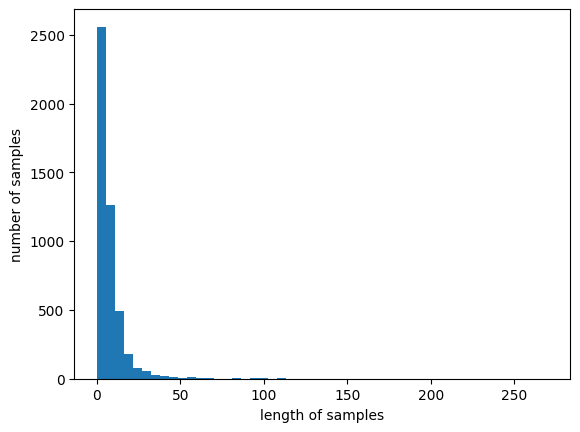

In [21]:
print('대화의 최대 길이 :',max(len(utterance) for utterance in tokenized_data))
print('대화의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(utterance) for utterance in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [26]:
model.wv.vectors.shape

(1523, 100)

In [27]:
print(model.wv.most_similar("요리"))

[('사람', 0.9998359680175781), ('적', 0.9998273253440857), ('재료', 0.9998014569282532), ('먹다', 0.9998005032539368), ('셰프', 0.9997822046279907), ('생각', 0.9997802972793579), ('게', 0.9997659921646118), ('음식', 0.9997602701187134), ('맛', 0.9997589588165283), ('면', 0.9997481107711792)]


In [31]:
model.wv.save_word2vec_format('first_w2v')
loaded_model = KeyedVectors.load_word2vec_format("first_w2v") 

In [32]:
!python -m gensim.scripts.word2vec2tensor --input first_w2v --output first_w2v

2024-10-30 17:32:25,648 - word2vec2tensor - INFO - running c:\Users\zqrc0\anaconda3\envs\studypy312\Lib\site-packages\gensim\scripts\word2vec2tensor.py --input first_w2v --output first_w2v
2024-10-30 17:32:25,648 - keyedvectors - INFO - loading projection weights from first_w2v
2024-10-30 17:32:25,854 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (1523, 100) matrix of type float32 from first_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-10-30T17:32:25.728706', 'gensim': '4.3.3', 'python': '3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'load_word2vec_format'}
2024-10-30 17:32:25,905 - word2vec2tensor - INFO - 2D tensor file saved to first_w2v_tensor.tsv
2024-10-30 17:32:25,905 - word2vec2tensor - INFO - Tensor metadata file saved to first_w2v_metadata.tsv
2024-10-30 17:32:25,906 - word2vec2tensor - INFO - finished running word2vec2tensor.py
